In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

In [2]:
nba_2014 = pd.read_csv('NBA_2014_games.csv', parse_dates=["Date"])
nba_2014.columns = ['Date', 'Start Time (ET)', 'Visitor Team','VisitorPts',
                    'Home Team', 'HomePts', 'Score Type', 'OverTime', 'Notes']

In [3]:
nba_2014[nba_2014['Date']=='2013-10-29']

,Date,Start Time (ET),Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OverTime,Notes
0,2013-10-29,7:00 pm,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,NaN
1,2013-10-29,10:30 pm,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,NaN
2,2013-10-29,8:00 pm,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,NaN


In [14]:
nba_2014['WL'] = nba_2014['VisitorPts'] < nba_2014['HomePts'] 

In [15]:
nba_2014 = nba_2014.sort_values('Date')

In [16]:
nba_2014['HomeLastWin'] = False
nba_2014['VisitorLastWin'] = False
nba_2014.head(5)

,Date,Start Time (ET),Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OverTime,Notes,WL,HomeLastWin,VisitorLastWin
0,2013-10-29,7:00 pm,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,NaN,True,False,False
1,2013-10-29,10:30 pm,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,NaN,True,False,False
2,2013-10-29,8:00 pm,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,NaN,True,False,False
15,2013-10-30,7:00 pm,Boston Celtics,87,Toronto Raptors,93,Box Score,NaN,NaN,True,False,False
14,2013-10-30,8:30 pm,Memphis Grizzlies,94,San Antonio Spurs,101,Box Score,NaN,NaN,True,False,False


In [17]:
y_true = nba_2014['WL'].values

In [18]:
nba_2014['HomeLastWin'].ix[1]

False

In [19]:
from collections import defaultdict

In [20]:
won_last = defaultdict(int)

for index, row in nba_2014.iterrows():
    home_team = row['Home Team']
    visitor_team = row['Visitor Team']
    row['HomeLastWin'] = won_last[home_team]
    row['VisitorLastWin'] = won_last[visitor_team]
    nba_2014.set_value(index, 'HomeLastWin', row['HomeLastWin'])
    nba_2014.set_value(index, 'VisitorLastWin', row['VisitorLastWin'])
    won_last[home_team] = row['WL']
    won_last[visitor_team] = not row['WL']
    #if index == 2:
    #    break

In [21]:
nba_2014.ix[20:25]

,Date,Start Time (ET),Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OverTime,Notes,WL,HomeLastWin,VisitorLastWin
20,2013-11-01,7:30 pm,Milwaukee Bucks,105,Boston Celtics,98,Box Score,NaN,NaN,False,False,False
21,2013-11-01,8:00 pm,Miami Heat,100,Brooklyn Nets,101,Box Score,NaN,NaN,True,False,False
22,2013-11-01,7:00 pm,Cleveland Cavaliers,84,Charlotte Bobcats,90,Box Score,NaN,NaN,True,False,True
23,2013-11-01,9:00 pm,Portland Trail Blazers,113,Denver Nuggets,98,Box Score,NaN,NaN,False,False,False
24,2013-11-01,8:00 pm,Dallas Mavericks,105,Houston Rockets,113,Box Score,NaN,NaN,True,True,True
25,2013-11-01,10:30 pm,San Antonio Spurs,91,Los Angeles Lakers,85,Box Score,NaN,NaN,False,False,True


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics, cross_validation

In [27]:
clf = DecisionTreeClassifier(random_state=14)

In [28]:
X_previouswins = nba_2014[['HomeLastWin', 'VisitorLastWin']].values

In [29]:
scores = cross_val_score(clf, X_previouswins, y_true, scoring='accuracy')
print('Accuracy: {0:.1f}%'.format(np.mean(scores)*100))

Accuracy: 57.5%


In [33]:
standings = pd.read_csv('NBA_2013_extended_standings.csv', skiprows=[0])

In [34]:
standings.head(10)

,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
0,1,Miami Heat,66-16,37-4,29-12,41-11,25-5,14-4,12-6,15-1,...,30-2,9-3,39-8,1-0,10-3,10-5,8-5,12-1,17-1,8-1
1,2,Oklahoma City Thunder,60-22,34-7,26-15,21-9,39-13,7-3,8-2,6-4,...,21-8,3-6,44-6,NaN,13-4,11-2,11-5,7-4,12-5,6-2
2,3,San Antonio Spurs,58-24,35-6,23-18,25-5,33-19,8-2,9-1,8-2,...,16-12,9-5,31-10,1-0,12-4,12-4,12-3,8-3,10-4,3-6
3,4,Denver Nuggets,57-25,38-3,19-22,19-11,38-14,5-5,10-0,4-6,...,24-4,11-7,28-8,0-1,8-8,9-6,12-3,8-4,13-2,7-1
4,5,Los Angeles Clippers,56-26,32-9,24-17,21-9,35-17,7-3,8-2,6-4,...,17-9,3-5,38-12,1-0,8-6,16-0,9-7,8-5,7-7,7-1
5,6,Memphis Grizzlies,56-26,32-9,24-17,22-8,34-18,8-2,8-2,6-4,...,23-8,6-4,28-9,0-1,12-1,7-7,10-7,9-2,11-6,7-2
6,7,New York Knicks,54-28,31-10,23-18,37-15,17-13,10-6,12-6,15-3,...,22-10,7-5,31-12,NaN,11-4,10-5,7-6,6-5,12-6,8-2
7,8,Brooklyn Nets,49-33,26-15,23-18,36-16,13-17,11-5,13-5,12-6,...,18-11,9-4,23-17,NaN,11-4,5-11,11-4,7-5,8-7,7-2
8,9,Indiana Pacers,49-32,30-11,19-21,31-20,18-12,6-11,13-3,12-6,...,17-11,4-9,27-14,1-0,7-8,10-5,9-6,9-3,11-5,2-5
9,10,Golden State Warriors,47-35,28-13,19-22,19-11,28-24,7-3,5-5,7-3,...,17-13,5-3,20-18,1-0,8-6,12-4,8-7,4-8,9-7,5-3


In [37]:
nba_2014['HomeTeamRanksHigher'] = 0
for index, row in nba_2014.iterrows():
    home_team, visitor_team = row['Home Team'], row['Visitor Team']
    if home_team == 'New Orleans Pelicans':
        home_team = 'New Orleans Hornets'
    elif visitor_team == 'New Orleans Pelicans':
        visitor_team = 'New Orleans Hornets'
    home_rank = standings[standings['Team'] == home_team]['Rk'].values[0]
    visitor_rank = standings[standings['Team'] == visitor_team]['Rk'].values[0]
    row['HomeTeamRanksHigher'] = int(home_rank > visitor_rank)
    nba_2014.set_value(index, 'HomeTeamRanksHigher', row['HomeTeamRanksHigher'])
    

In [39]:
X_homehigher = nba_2014[['HomeLastWin', 'VisitorLastWin', 'HomeTeamRanksHigher']].values

In [40]:
clf = DecisionTreeClassifier(random_state=14)
scores = cross_val_score(clf, X_homehigher, y_true, scoring='accuracy')
print('Accuracy: {0:.1f}%'.format(np.mean(scores)*100))

Accuracy: 59.7%


In [41]:
last_match_winner = defaultdict(int)
nba_2014['HomeTeamWonLast'] = 0
for index, row in nba_2014.iterrows():
    home_team, visitor_team = row['Home Team'], row['Visitor Team']
    teams = tuple(sorted([home_team, visitor_team]))
    row['HomeTeamWonLast'] = 1 if last_match_winner[teams] == row['Home Team'] else 0
    nba_2014.set_value(index, 'HomeTeamWonLast', row['HomeTeamWonLast'])
    winner = row['Home Team'] if row['WL'] else row['Visitor Team']
    last_match_winner[teams] = winner

In [44]:
nba_2014[nba_2014['HomeTeamWonLast'] == 1].head(5)

,Date,Start Time (ET),Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OverTime,Notes,WL,HomeLastWin,VisitorLastWin,HomeTeamRanksHigher,HomeTeamWonLast
67,2013-11-06,7:00 pm,Washington Wizards,116,Philadelphia 76ers,102,Box Score,NaN,NaN,False,False,False,0,1
72,2013-11-08,7:00 pm,New York Knicks,101,Charlotte Bobcats,91,Box Score,NaN,NaN,False,True,False,1,1
96,2013-11-10,8:00 pm,New Orleans Pelicans,94,Phoenix Suns,101,Box Score,NaN,NaN,True,True,True,1,1
97,2013-11-11,7:30 pm,Orlando Magic,105,Boston Celtics,120,Box Score,NaN,NaN,True,True,False,0,1
143,2013-11-16,7:30 pm,Atlanta Hawks,110,New York Knicks,90,Box Score,NaN,NaN,False,False,True,0,1


In [48]:
X_lastwinner = nba_2014[['HomeLastWin', 'VisitorLastWin', 'HomeTeamRanksHigher', 'HomeTeamWonLast']].values
clf = DecisionTreeClassifier(random_state=14)
scores = cross_val_score(clf, X_lastwinner, y_true, scoring='accuracy')
print('Accuracy: {0:.1f}%'.format(np.mean(scores)*100))

Accuracy: 60.4%


In [49]:
from sklearn.preprocessing import LabelEncoder
encoding = LabelEncoder()

In [50]:
encoding.fit(nba_2014['Home Team'].values)

LabelEncoder()

In [52]:
home_teams = encoding.transform(nba_2014['Home Team'].values)
visitor_teams = encoding.transform(nba_2014['Visitor Team'].values)
X_teams = np.vstack([home_teams, visitor_teams]).T
#X_teams.shape

(1319, 2)

In [53]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()

In [54]:
X_teams_expanded = onehot.fit_transform(X_teams).todense()

In [58]:
X_teams_expanded = np.concatenate((X_lastwinner, X_teams_expanded), axis=1)

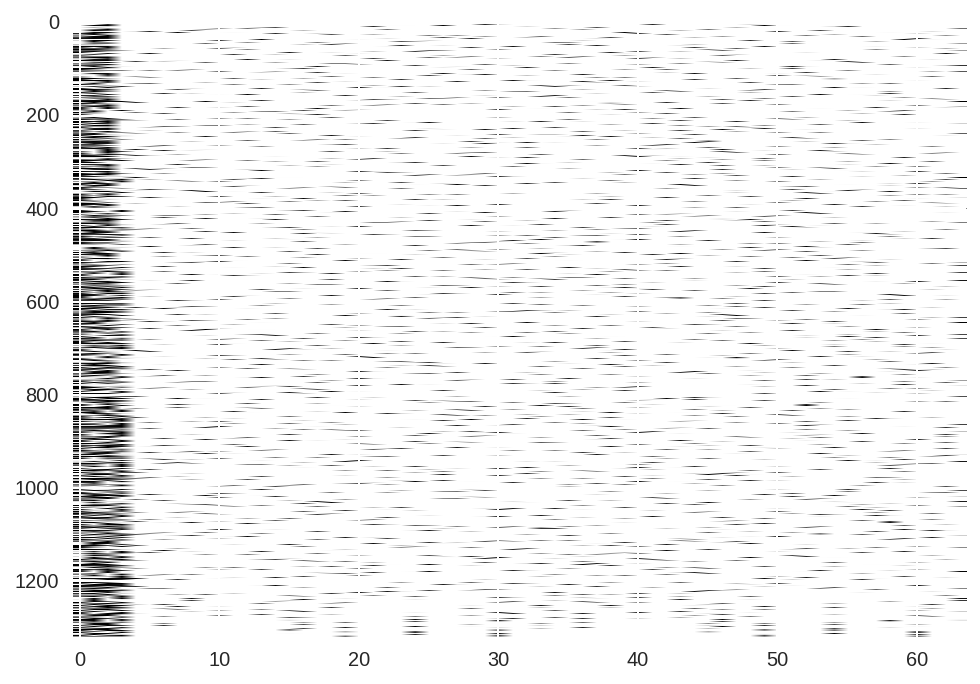

In [85]:
plt.imshow(X_teams_expanded.astype(float),aspect='auto')

In [60]:
clf = DecisionTreeClassifier(random_state=14)
scores = cross_val_score(clf, X_teams_expanded, y_true, scoring='accuracy')
print('Accuracy: {0:.1f}%'.format(np.mean(scores)*100))

Accuracy: 59.1%


In [61]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
clf = RandomForestClassifier(random_state=14)
scores = cross_val_score(clf, X_teams_expanded, y_true, scoring='accuracy')
print('Accuracy: {0:.1f}%'.format(np.mean(scores)*100))

Accuracy: 60.3%


In [66]:
from sklearn.grid_search import GridSearchCV

In [68]:
parameter_space = {
    'max_features': [2, 10, 'auto'],
    'n_estimators': [100,],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [2, 4, 6]
}
clf = RandomForestClassifier(random_state=14)
grid = GridSearchCV(clf, parameter_space)
grid.fit(X_teams_expanded, y_true)
print('Accuracy: {0:.1f}%'.format(grid.best_score_ * 100))

Accuracy: 64.7%


In [69]:
print(grid.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=14, verbose=0, warm_start=False)
